##### Arbitrary Value Imputation
Arbitrary Value Imputation technique was derived from kaggle competition .It consists of replacing NAN by an arbitrary value
Both categorical and numerical variables can be imputed by arbitrary values.
For categorical variables, this is the equivalent of replacing all instances of NA by an additional label called ‘Missing’, which is a very common practice.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Feature Engineering\Part 3\titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

In [7]:
impute_nan(df,'Age')

In [8]:
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


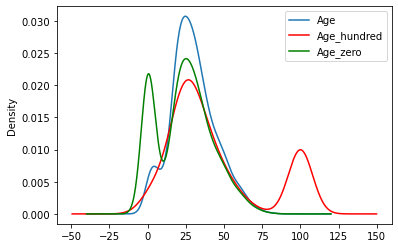

In [12]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_hundred.plot(kind='kde', ax=ax, color='red')
df.Age_zero.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Advantages:
1. Easy to implement
2. Fast way of obtaining complete datasets
3. Can be integrated into production (during model deployment)
4.Captures the importance of “missingness” if there is one

Limitations:
1. Distortion of the original variable distribution
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use

#####  Frequent Category Imputation
This technique says to replace the missing value with the variable with the highest frequency or in simple words replacing the values with the Mode of that column. This technique is also referred to as Mode Imputation.

In [14]:
df=pd.read_csv(r'D:\Feature Engineering\Part 3\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [15]:
df.shape

(1460, 4)

In [16]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [17]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:>

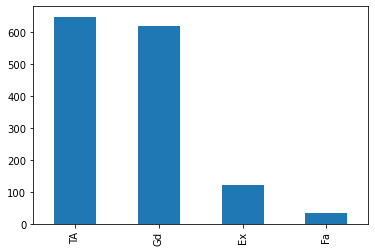

In [18]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

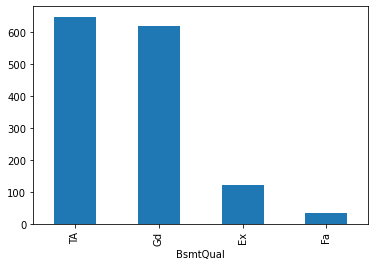

In [19]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

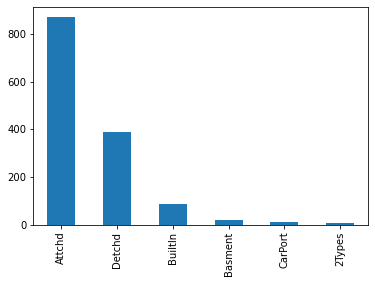

In [22]:
# or we can use value_counts()
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

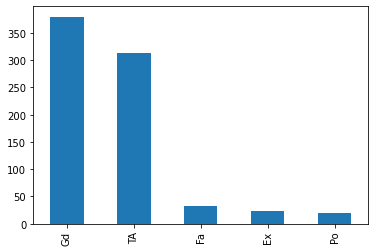

In [23]:
df['FireplaceQu'].value_counts().plot.bar()

In [24]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [26]:
# or we can use mode()
df['GarageType'].mode()[0]

'Attchd'

In [27]:
# create a function to replace the NaN values with mode
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [28]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [29]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

##### Advantages
1. Easy To implement
2. Fater way to implement 
3. We can obtain a complete dataset in very little time.

##### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label